# Homework #1 - Basic Statistics

**In this assignment, you are going to solve some basic statistical problems like estimating parameters of a distribution. In each problem, you are instructed to write little chunks of Python code. Additionally, there are few questions that you have to answer based on your observations and your knowledge of statistics.**

**Ultimately, you are expected to submit your solutions as a single jupyter notebook, *not a python script or anything else.***

**In the case of any questions, post it on the Q&A forum.**

Good Luck

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import scipy.stats

from dists import *

# Problem #1 - Parameter Estimation

**A) By calling `my_kappa(n_sample, student_id)`, draw a sample of size 100 from the my_kappa distribution.**

In [2]:
n_sample = 100
student_id = 810696336
sample = my_kappa(n_sample, student_id)

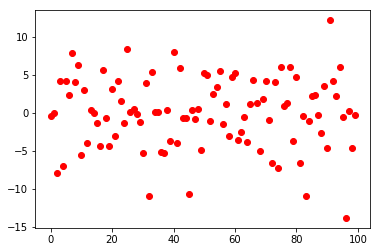

In [3]:
plt.plot(sample, 'ro')

**B) Calculate and print the mean of the sample you've just drawn.**

In [4]:
mean = sample.mean()
print('mean:', mean)

mean: -0.00883193819708624


**C) Calculate the *unbiased estimation* of the standard deviation of your sample.**


$$unbiased \space estimation \space of \space the \space variance
\space (S^2) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})^2}{N-1}$$

$$unbiased \space estimation \space of \space the \space standard \space deviation
\space (S) = \sqrt{S^2}$$

In [5]:
UESD = ((((sample - mean)**2)/(len(sample)-1)).sum())**(1/2)
print("Unbiased estimation of the standard deviation", UESD)

Unbiased estimation of the standard deviation 4.659812565332922


**D) Answer the following questions.**
- What is an unbiased estimator?

> <div>
> <p>
In statistics we describe a population using some quantities such as mean, variance, mode, median, standard deviation and ...</p>
> <p style="text-align: justify;">
Since the population is usually too big, the calculation of mentioned quantities is usually too hard, therefore we need to estimate these quantities of interest from the population. Sampling techniques are one of the most useful methods which have some advantages and disadvantages; low accuracy (overestimation or underestimation) has been one of the main difficulties associated with these methods of estimation. In convolution a quantity which we use to approximate a population is an estimator, and we define an estimator unbiased, if the estimation is accurate (by means of low over/under-estimation). In other definition an unbiased estimator is when the statistical parameters of sampling distribution is equal to the population’s parameter.
</p>
</div>

- In what situations the maximum likelihood estimation of the variance of a distribution can severely contaminate the estimation?

> <div>
> <p style="text-align: justify;">
    - The maximum likelihood estimation is biased if the sample is too small. <br>
    - MLE is non-trivial and for initial values it would be unstable.
</p>
</div>

**E) Now, draw 2000 samples of size 100 and store their means in an array You're going to use this array in the next questions.**

In [6]:
sample_mean = np.array([my_kappa(n_sample, student_id).mean() for i in range(2000)])

# Problem #2 - Data Visualization and CLT

**A) Draw a sample of size 2000 from my_kappa distribution. Then, using matplotlib package, depict the histogram of your sample.**

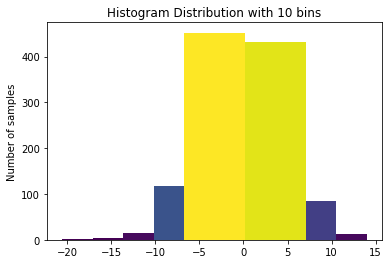

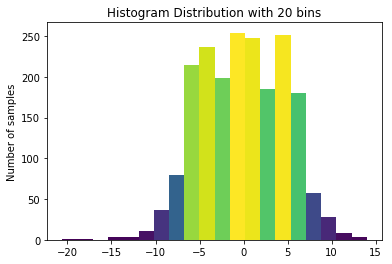

In [7]:
n_sample = 2000
sample = my_kappa(n_sample, student_id)

n_bins = [10, 20]
for n_bin in n_bins:
    N, bins, patches = plt.hist(sample, bins=n_bin)
    fracs = N / N.max()
    plt.title('Histogram Distribution with ' + str(n_bin) + ' bins')
    plt.ylabel('Number of samples')
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    plt.show()

**B) Now, plot the histogram of the sample means you've calculate in problem 1 part E.**

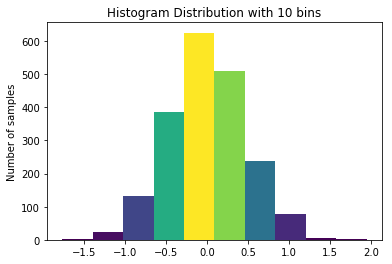

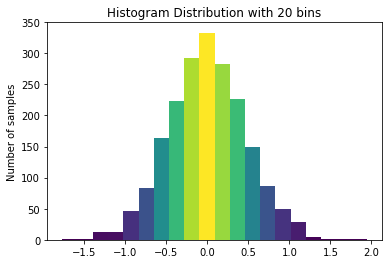

In [8]:
n_sample = 2000

n_bins = [10, 20]
for n_bin in n_bins:
    N, bins, patches = plt.hist(sample_mean, bins=n_bin)
    fracs = N / N.max()
    plt.title('Histogram Distribution with ' + str(n_bin) + ' bins')
    plt.ylabel('Number of samples')
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    plt.show()

**C) Considering the 2000 realizations of the sample means distribution you've calculated in problem 1 part E, compute their mean and standard deviation.**

In [9]:
mean = sample_mean.mean()
STD = sample_mean.std()
print('mean:', mean)
print('STD:', STD)

mean: -0.0019292664751558175
STD: 0.4707384897446875


**D) Answer the following questions.**

- What do you think is the main characteristic of the second histogram?

> <div>
> <p style="text-align: justify;">
The histogram is close to a normal distribution.<br>
Central limit theorem: no mater what is the distribution of the initial random variable, the distribution of sample means will be closer to normal distribution as we increase the size of samples.
</p>
</div>

- Interpret the results of part C. Do these results have any association with your estimation of the mean of my_kappa distribution? Explain.

> <div>
 <table style="text-align: center; width:500px">
  <tr>
    <th style="text-align: center;"></th>
    <th style="text-align: center;">Mean</th>
    <th style="text-align: center;">STD (unbiased estimation)</th>
  </tr>
  <tr>
    <td style="text-align: center;">First Sample</td>
    <td style="text-align: center;">-0.008831</td>
    <td style="text-align: center;">4.65981</td>
  </tr>
  <tr>
    <td style="text-align: center;">Sample Mean</td>
    <td style="text-align: center;">-0.001929</td>
    <td style="text-align: center;">0.470738</td>
  </tr>
 </table>
 <p style="text-align: justify;">
     The sampling distribution of sample mean has the same mean as the original distribution. (In this particular example there might be some slight differences and the reason can be the unbiased sample)
     $$\mu_\bar{X} = \mu$$
     As we increase the samples size (of sampling distribution of sample mean), the kurtosis of the resulted normal distribution increase, and the variance (and standard deviation) decrease. The variance of the sampling distribution of the mean is the population variance divided by N.
 </p>
 <br>
 $$\sigma_{sample \space mean} ^2 = \frac{\sigma_{original \space distribution}^2}{{N}}$$
 <br>
 $$\sigma_{sample \space mean} = \frac{\sigma_{original \space distribution}}{\sqrt{N}}$$
</div>
<img src="http://ceadserv1.nku.edu/longa/classes/sta205-022/days/images/clt_sim2.gif">

# Problem #3 - Confidence Interval

**A) Construct a 95% confidence interval on the sample means of my_kappa distribution. Your result, obviously, consists of two numbers: a lower bound and an upper bound of the calculated interval.**

In [10]:
def confidence_interval(sample, confidence):
    mean = np.mean(sample)
    se = scipy.stats.sem(sample)
    ci = se * scipy.stats.t.ppf((1 + confidence) / 2., len(sample)-1)
    return ci

In [11]:
ci = confidence_interval(sample_mean, 0.95)
print('Mean:', sample_mean.mean())
print('Confidece Intercal', ci)
print('from', sample_mean.mean()-ci, 'to', sample_mean.mean()+ci)

Mean: -0.0019292664751558175
Confidece Intercal 0.02064830655715918
from -0.022577573032314998 to 0.018719040082003365


Another way to calculate the cofidence iterval is to use the normal integral costants table:
$$ confidence \space interval = \bar{X} \pm Z\frac{s}{\sqrt{N}} $$

<table>
    <tbody>
        <tr>
            <td style="text-align: center;"><b>Confidence<br>
                Interval</b></td>
            <td style="text-align: center;"><b>Z</b></td>
        </tr>
        <tr>
            <td width="100" style="text-align: center;">80%</td>
            <td width="100" style="text-align: center;">1.282</td>
        </tr>
        <tr>
            <td width="100" style="text-align: center;">85%</td>
            <td style="text-align: center;">1.440</td>
        </tr>
        <tr>
            <td width="100" style="text-align: center;">90%</td>
            <td style="text-align: center;">1.645</td>
        </tr>
        <tr>
            <td width="100" style="text-align: center;">95%</td>
            <td style="text-align: center;">1.960</td>
        </tr>
        <tr>
            <td width="100" style="text-align: center;">99%</td>
            <td style="text-align: center;">2.576</td>
        </tr>
        <tr>
            <td width="100" style="text-align: center;">99.5%</td>
            <td style="text-align: center;">2.807</td>
        </tr>
        <tr>
            <td width="100" style="text-align: center;">99.9%</td>
            <td style="text-align: center;">3.291</td>
        </tr>
    </tbody>
 </table>
			

In [12]:
ci = 1.96*sample_mean.std()/(len(sample_mean))**(1/2)
print('Mean:', sample_mean.mean())
print('Confidece Intercal', ci)
print('from', sample_mean.mean()-ci, 'to', sample_mean.mean()+ci)

Mean: -0.0019292664751558175
Confidece Intercal 0.020631023948816295
from -0.02256029042397211 to 0.01870175747366048


**B) What does this interval mean?**

> <div>
> <p style="text-align: justify;">
Confidence  interval express the degree of uncertainty around a certain effect. The smaller confidence interval, the more precise the estimated effect. Confidence interval is a range which defines that there is a specified probability that the value of a parameter lies within it. (In this specific example the probability is equal to 0.95)
</p>
</div>

# Problem #4 - Estimating The Parameters of Some Observations

**In this problem, you're going to estimate the average of a random variable. In contrast with previous problems, this time the observations are collected one by one. To observe a single realization of this random variable, call `my_omicron(student_id)` function. Upon calling this function, a single observation/realization of this random variable is returned.**

**A) Draw 100 samples from my_omicron distribution. After observing each realization, calculate the sample mean of the realizations you've observed so far. In addition to that, construct a confidence interval for your estimation at 0.1 significane level. Finally, plot your estimations in a bar plot alongside their confidence errors as whisckers of each bar. Your final plot should be similar to this:**

<img src="https://support.content.office.net/en-us/media/68efe29e-f30c-4c6f-95cf-9cff7dde1131.jpg" width="400px" alt="no internet connection!">

In [13]:
samples = []
mean = []
std = []
confidence_interval = []
for i in range(100):
    samples.append(my_omicron(student_id)[0])
    mean.append(np.array(samples).mean())
    std.append(np.array(samples).std())
    confidence_interval.append(1.645*np.array(samples).std()/(len(samples))**(1/2))

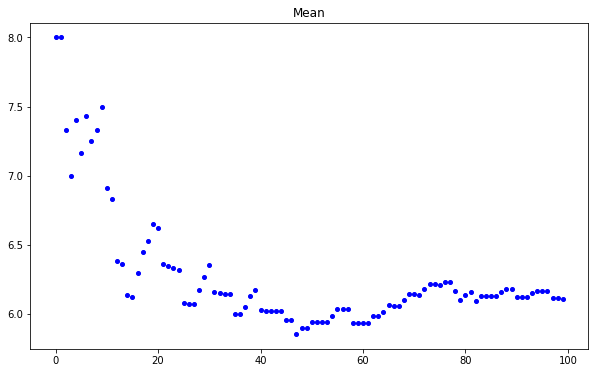

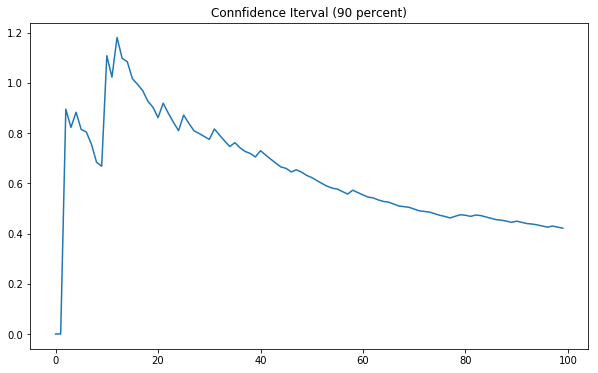

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(mean, 'bo', markersize=4)
plt.title('Mean')
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(confidence_interval)
plt.title('Connfidence Iterval (90 percent)')
plt.show()

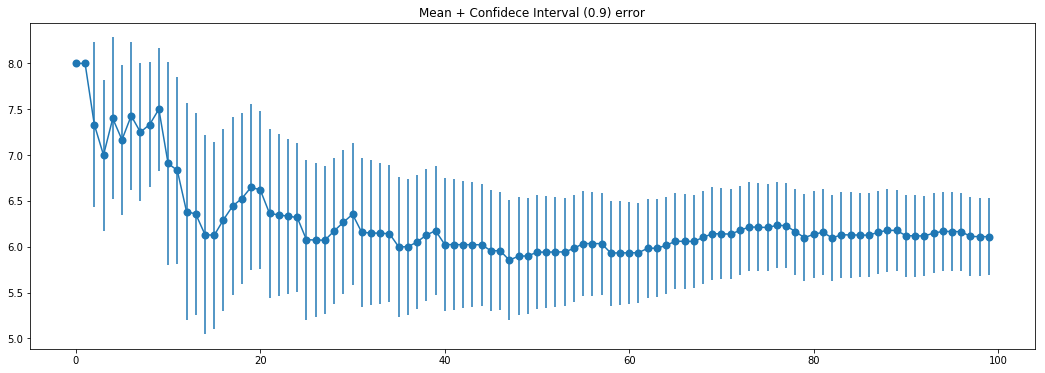

In [15]:
plt.figure(figsize=(18, 6))
plt.errorbar(range(100), mean, confidence_interval, mew=2, fmt='-o')
plt.title('Mean + Confidece Interval (0.9) error')
plt.show()

**B) How is your estimation changing over time? How is your confidence interval changing? Explain why.**

> <div>
> <p style="text-align: justify;">
    As the number of observations increases, the mean and confidence interval values become more stable. at fist, we observe turbulent mean and high interval of confidece. This indicates that the smaller our sample, the less confident we can express the statistical characteristics of the population.


</p>
</div>